<a href="https://colab.research.google.com/github/mdfarhan825301-ship-it/endToEndDataAnalysis/blob/main/Superstore_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating a Csv File

In [ ]:
!pip install faker
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from faker import Faker

In [ ]:
fake = Faker()

**Define Base list**

In [ ]:
categories = {"Furniture": ["Office Chair", "Study Table", "Sofa", "Bookshelf", "Dining Table" ],
              "Office Supplies": ["Pen", "Noptebook", "Stapler", "File Folder", "Calculator"],
              "Electronics": ["Laptop", "Keyboard", "Mouse", "Headphones", "Monitor"],
              "Grocery": ["Rice Bag", "Cooking oil", "Sugar", "Snacks", "Juice Park"]}

regions = ["North", "South", "East", "West"]
payment_modes = ["Cash", "Credit Card", "UPI", "Net Banking"]
delivery_status = ["Delivered", "Pending", "Returned", "Cancelled"]
customer_segments = ["Consumer", "Corporate", "Home Office"]

**Generate Dataset**

In [ ]:
records = []                       # Empty
for i in range(1000):              # 1000 fake orders
    order_id = f"ORD{1000 + i}"
    order_date = fake.date_between(start_date = '-2y', end_date= 'today')
    ship_date = order_date + pd.Timedelta(days=random.randint(1, 7))

    customer_name = fake.name()
    customer_id = f"CUST{random.randint(100, 999)}"
    customer_segment = random.choice(customer_segments)

    category = random.choice(list(categories.keys()))
    product_name = random.choice(categories[category])
    product_id = f"PROD{random.randint(1000, 9999)}" # Adjusted range for product_id

    region = random.choice(regions)
    state = fake.state()
    city = fake.city()

    quantity = random.randint(1, 10)
    unit_price = random.randint(100, 5000)
    discount = random.choice([0, 5, 10, 15, 20]) # random.choice needs a sequence/list

    sales_amount = quantity * unit_price * (1 - discount / 100)
    cost_price = sales_amount * random.uniform(0.63, 0.9)
    profit = sales_amount - cost_price

    stock_left = random.randint(0, 50)

    if stock_left < 10:
      auto_recorder = "Yes"
      reorder_quantity = random.randint(20, 50) # Fixed typo
    else:
      auto_recorder = "No"
      reorder_quantity = 0

    supplier_name = fake.company()
    supplier_email = fake.company_email()
    payment_mode = random.choice(payment_modes)
    delivery = random.choice(delivery_status)

    records.append({
        "Order Id": order_id,
        "Order Date": order_date,
        "Ship Date": ship_date,
        "Customer Id": customer_id,
        "Customer Name": customer_name,
        "Customer Segment": customer_segment,
        "Category": category,
        "Product Name": product_name,
        "Product Id": product_id,
        "Region": region,
        "State": state,
        "City": city,
        "Quantity": quantity,
        "Unit Price": unit_price,
        "Discount %": discount,
        "Sales Amount": round(sales_amount, 3),
        "Cost Price": round(cost_price, 2),
        "Profit": round(profit, 2),
        "Payment mode": payment_mode,
        "Delivery Status": delivery,
        "Supplier Name": supplier_name,
        "Supplier Email": supplier_email,
        "Stock Left": stock_left,
        "Auto Recorder": auto_recorder,
        "Reorder Quantity": reorder_quantity
    })

**Create Dataframe and save to csv**

In [ ]:
df = pd.DataFrame(records)
try:
  df.to_csv("superstore_Management_System.csv", index = False)
  print("Dataset generated successfully! File saved as 'Superstore_Management_System.csv'")
except PermissionError:
    print("Please Close the file 'Superstore_Management_System' if it's open in Exxcel or Power Bi")

Dataset generated successfully! File saved as 'Superstore_Management_System.csv'


# Exploratory Data Analysis

**Importing the liabraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

**Basic Analysis**

In [ ]:
df = pd.read_csv('/content/superstore_Management_System.csv')
df.head()

,Order Id,Order Date,Ship Date,Customer Id,Customer Name,Customer Segment,Category,Product Name,Product Id,Region,...,Sales Amount,Cost Price,Profit,Payment mode,Delivery Status,Supplier Name,Supplier Email,Stock Left,Auto Recorder,Reorder Quantity
0,ORD1000,2025-02-21,2025-02-24,CUST295,Eric Joseph,Consumer,Electronics,Monitor,PROD8114,South,...,7962.80,5617.24,2345.56,Net Banking,Returned,"Riggs, Green and Barnes",dpowell@harper-torres.biz,46,No,0
1,ORD1001,2024-07-11,2024-07-12,CUST743,Linda Williams,Consumer,Office Supplies,File Folder,PROD5346,East,...,16388.00,10454.81,5933.19,Net Banking,Delivered,Munoz LLC,mmartinez@miller.com,46,No,0
2,ORD1002,2025-05-23,2025-05-26,CUST607,Teresa Wilson,Consumer,Office Supplies,Stapler,PROD6287,West,...,3371.95,2350.94,1021.01,Credit Card,Pending,"Johnson, Rivera and Murphy",denniswatson@haley.com,41,No,0
3,ORD1003,2024-08-31,2024-09-04,CUST976,James Moss,Home Office,Electronics,Monitor,PROD3931,East,...,367.20,313.29,53.91,Credit Card,Cancelled,Bailey and Sons,walkerkristina@knight.com,36,No,0
4,ORD1004,2024-03-06,2024-03-07,CUST620,Jessica Villa,Consumer,Grocery,Cooking oil,PROD8256,West,...,17895.90,15708.12,2187.78,UPI,Returned,"Pitts, Butler and Sanders",harveychristopher@brown.biz,7,Yes,23


In [ ]:
df.tail()

,Order Id,Order Date,Ship Date,Customer Id,Customer Name,Customer Segment,Category,Product Name,Product Id,Region,...,Sales Amount,Cost Price,Profit,Payment mode,Delivery Status,Supplier Name,Supplier Email,Stock Left,Auto Recorder,Reorder Quantity
995,ORD1995,2024-01-31,2024-02-06,CUST286,Emily Valdez,Home Office,Office Supplies,Noptebook,PROD3382,East,...,2891.7,2513.21,378.49,Credit Card,Delivered,Everett PLC,contrerasmichael@watson-lopez.com,49,No,0
996,ORD1996,2024-02-22,2024-02-24,CUST598,Daniel Powell,Consumer,Electronics,Laptop,PROD2893,West,...,20672.0,14555.46,6116.54,Cash,Cancelled,"Villegas, Ford and Roy",kellylisa@wright-nolan.org,18,No,0
997,ORD1997,2024-02-17,2024-02-18,CUST760,Stephen Stewart,Corporate,Grocery,Sugar,PROD3871,North,...,4345.2,3444.55,900.65,Credit Card,Delivered,Robinson Inc,cdrake@hayes.biz,42,No,0
998,ORD1998,2025-09-01,2025-09-08,CUST260,Hannah Ayers,Home Office,Grocery,Juice Park,PROD9495,West,...,26120.0,20637.83,5482.17,Net Banking,Returned,Stephens PLC,zolson@kline.info,44,No,0
999,ORD1999,2024-08-29,2024-09-05,CUST206,Crystal Porter,Consumer,Furniture,Dining Table,PROD5675,North,...,2379.6,1572.32,807.28,Credit Card,Delivered,Myers Inc,matthewsdawn@hill.net,19,No,0


In [ ]:
f'Data Type is :{type(df)}'

"Data Type is :<class 'pandas.core.frame.DataFrame'>"

**Finding Datatypes for Each Columns**

In [ ]:
df.dtypes

,0
Order Id,object
Order Date,object
Ship Date,object
Customer Id,object
Customer Name,object
Customer Segment,object
Category,object
Product Name,object
Product Id,object
Region,object


**Finding Summary of Dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order Id          1000 non-null   object 
 1   Order Date        1000 non-null   object 
 2   Ship Date         1000 non-null   object 
 3   Customer Id       1000 non-null   object 
 4   Customer Name     1000 non-null   object 
 5   Customer Segment  1000 non-null   object 
 6   Category          1000 non-null   object 
 7   Product Name      1000 non-null   object 
 8   Product Id        1000 non-null   object 
 9   Region            1000 non-null   object 
 10  State             1000 non-null   object 
 11  City              1000 non-null   object 
 12  Quantity          1000 non-null   int64  
 13  Unit Price        1000 non-null   int64  
 14  Discount %        1000 non-null   int64  
 15  Sales Amount      1000 non-null   float64
 16  Cost Price        1000 non-null   float64
 

**Finding All Column Names**

In [ ]:
df.columns

Index(['Order Id', 'Order Date', 'Ship Date', 'Customer Id', 'Customer Name',
       'Customer Segment', 'Category', 'Product Name', 'Product Id', 'Region',
       'State', 'City', 'Quantity', 'Unit Price', 'Discount %', 'Sales Amount',
       'Cost Price', 'Profit', 'Payment mode', 'Delivery Status',
       'Supplier Name', 'Supplier Email', 'Stock Left', 'Auto Recorder',
       'Reorder Quantity'],
      dtype='object')

**Find All Data**

In [ ]:
pd.set_option('display.max_rows', None)
df

,Order Id,Order Date,Ship Date,Customer Id,Customer Name,Customer Segment,Category,Product Name,Product Id,Region,...,Sales Amount,Cost Price,Profit,Payment mode,Delivery Status,Supplier Name,Supplier Email,Stock Left,Auto Recorder,Reorder Quantity
0,ORD1000,2025-02-21,2025-02-24,CUST295,Eric Joseph,Consumer,Electronics,Monitor,PROD8114,South,...,7962.80,5617.24,2345.56,Net Banking,Returned,"Riggs, Green and Barnes",dpowell@harper-torres.biz,46,No,0
1,ORD1001,2024-07-11,2024-07-12,CUST743,Linda Williams,Consumer,Office Supplies,File Folder,PROD5346,East,...,16388.00,10454.81,5933.19,Net Banking,Delivered,Munoz LLC,mmartinez@miller.com,46,No,0
2,ORD1002,2025-05-23,2025-05-26,CUST607,Teresa Wilson,Consumer,Office Supplies,Stapler,PROD6287,West,...,3371.95,2350.94,1021.01,Credit Card,Pending,"Johnson, Rivera and Murphy",denniswatson@haley.com,41,No,0
3,ORD1003,2024-08-31,2024-09-04,CUST976,James Moss,Home Office,Electronics,Monitor,PROD3931,East,...,367.20,313.29,53.91,Credit Card,Cancelled,Bailey and Sons,walkerkristina@knight.com,36,No,0
4,ORD1004,2024-03-06,2024-03-07,CUST620,Jessica Villa,Consumer,Grocery,Cooking oil,PROD8256,West,...,17895.90,15708.12,2187.78,UPI,Returned,"Pitts, Butler and Sanders",harveychristopher@brown.biz,7,Yes,23
5,ORD1005,2024-06-11,2024-06-18,CUST252,Rhonda Osborne,Home Office,Office Supplies,Noptebook,PROD4214,West,...,6576.45,4323.05,2253.40,Net Banking,Pending,Callahan Inc,shermanstephanie@hansen.com,46,No,0
6,ORD1006,2025-11-12,2025-11-16,CUST539,Sophia Barr,Consumer,Office Supplies,Pen,PROD2862,West,...,1988.00,1481.39,506.61,Net Banking,Returned,Parker-Lewis,zlee@mccullough-riddle.com,23,No,0
7,ORD1007,2025-07-03,2025-07-04,CUST498,Mary Francis,Consumer,Grocery,Juice Park,PROD4319,North,...,4265.50,3152.99,1112.51,Credit Card,Delivered,"Johnson, Miller and Wilkerson",cwilliams@ochoa.com,28,No,0
8,ORD1008,2025-02-04,2025-02-11,CUST672,Joseph Tran,Corporate,Furniture,Office Chair,PROD1417,East,...,3096.00,2221.85,874.15,Cash,Pending,Callahan Group,zgarcia@castillo-elliott.com,0,Yes,28
9,ORD1009,2024-12-24,2024-12-27,CUST568,Kayla Herman,Home Office,Office Supplies,Pen,PROD6531,North,...,947.20,707.75,239.45,Net Banking,Returned,Brown and Sons,john17@rose.com,35,No,0


**Finding out the shape of Dataset**

In [ ]:
f'There are total rows and columns is :{df.shape}'

'There are total rows and columns is :(1000, 25)'

**Description of Dataset**

In [ ]:
df.describe(include='object')

,Order Id,Order Date,Ship Date,Customer Id,Customer Name,Customer Segment,Category,Product Name,Product Id,Region,State,City,Payment mode,Delivery Status,Supplier Name,Supplier Email,Auto Recorder
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,543,543,610,992,3,4,20,952,4,50,966,4,4,971,1000,2
top,ORD1999,2025-07-13,2024-11-09,CUST398,Sarah Williams,Corporate,Furniture,Study Table,PROD2476,South,North Dakota,South Michael,UPI,Delivered,Ramirez and Sons,matthewsdawn@hill.net,No
freq,1,6,7,5,2,348,268,59,3,264,33,3,256,263,4,1,805


# Data Analysis

**Handling Missing Values**

In [ ]:
print("\n=== DATA QUALITY ASSESSMENT===")
df.isnull().sum()
df.duplicated().sum()


=== DATA QUALITY ASSESSMENT===


np.int64(0)

**Data Type Conversion**

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%Y-%m-%d')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%Y-%m-%d')


print("\nDate columns converted:\n")
print(f"Order Date: {df['Order Date'].dtype}")
print(f"Ship Date: {df['Ship Date'].dtype}")


Date columns converted:

Order Date: datetime64[ns]
Ship Date: datetime64[ns]


# Univariate Analysis


=== CATEGORICAL VARIABLES ===


---Customer Segment--
Customer Segment
Corporate      348
Consumer       329
Home Office    323
Name: count, dtype: int64


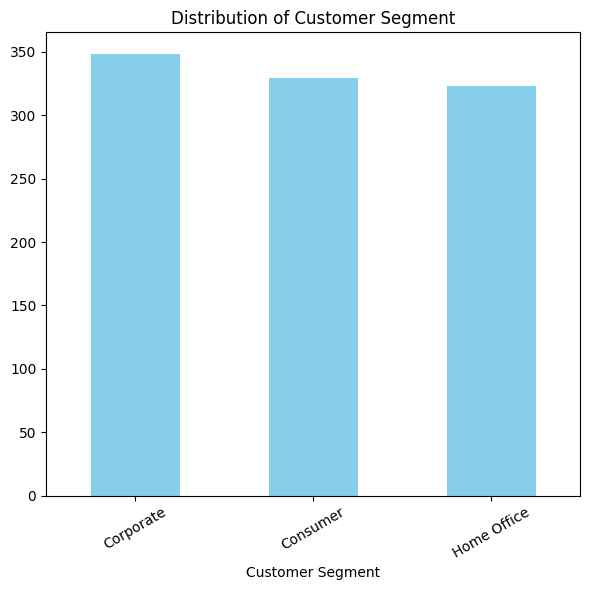


---Category--
Category
Furniture          268
Electronics        259
Grocery            240
Office Supplies    233
Name: count, dtype: int64


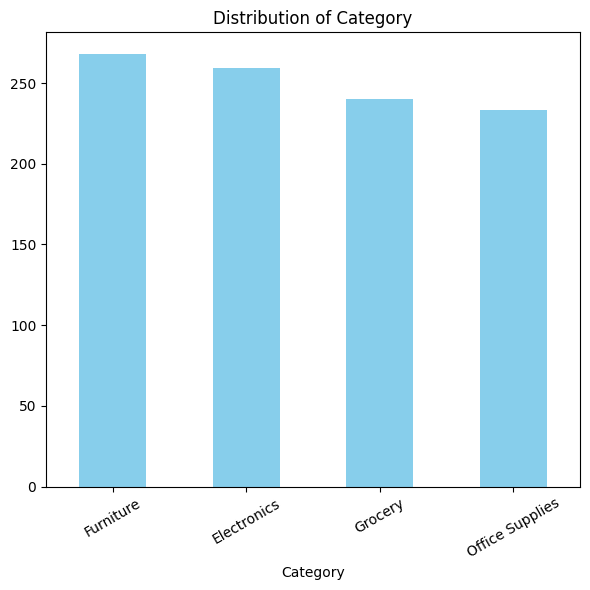


---Region--
Region
South    264
North    254
East     241
West     241
Name: count, dtype: int64


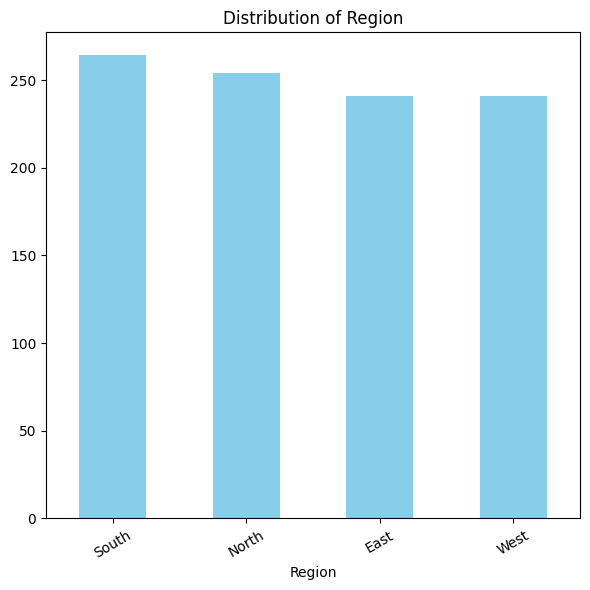


---Payment mode--
Payment mode
UPI            256
Net Banking    255
Credit Card    249
Cash           240
Name: count, dtype: int64


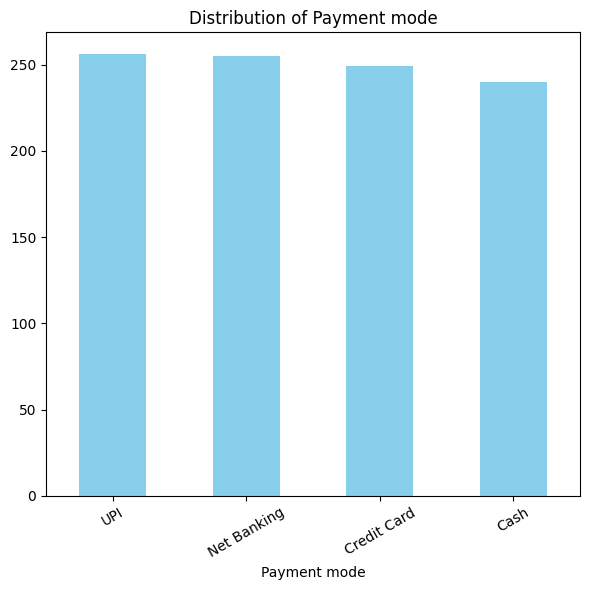


---Delivery Status--
Delivery Status
Delivered    263
Pending      248
Cancelled    247
Returned     242
Name: count, dtype: int64


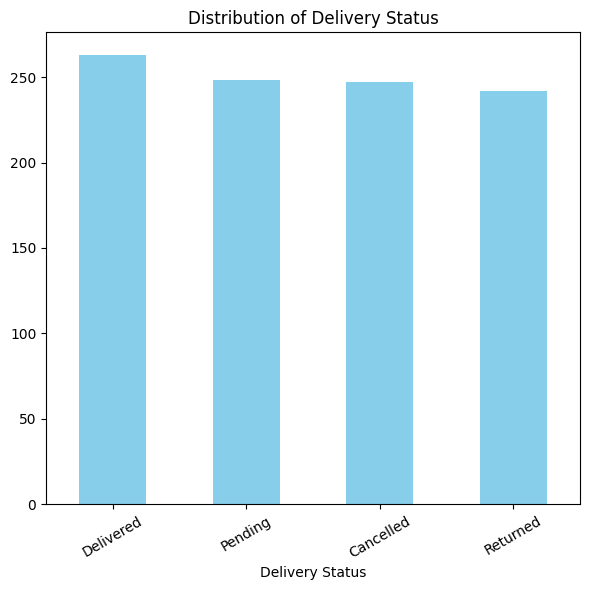


---Auto Recorder--
Auto Recorder
No     805
Yes    195
Name: count, dtype: int64


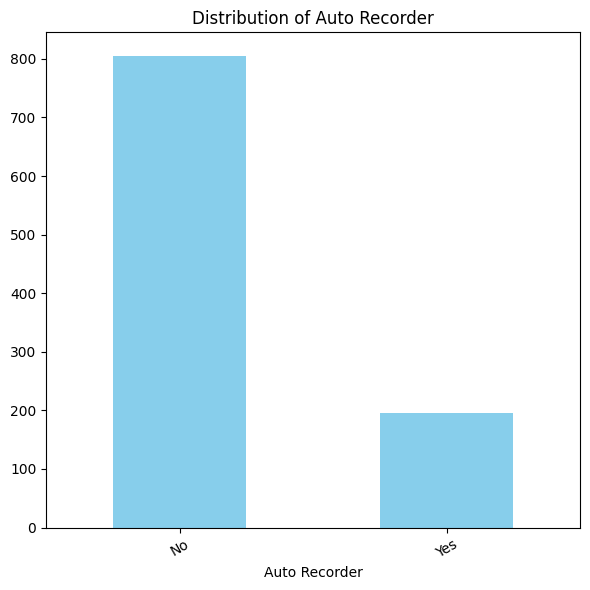

In [ ]:
# Univariate analysis is the simplest form of statistical analysis. As the name suggests -"uni" means "one", and "variate" means "variable".

print("\n=== CATEGORICAL VARIABLES ===\n")

categorical_cols = ['Customer Segment', 'Category', 'Region', 'Payment mode', 'Delivery Status', 'Auto Recorder']

for col in categorical_cols:
  print(f"\n---{col}--")
  print(df[col].value_counts())

  # Visualization
  plt.figure(figsize=(6, 6))
  df[col].value_counts().plot(kind= 'bar', color = 'skyblue')
  plt.title(f'Distribution of {col}')
  plt.xticks(rotation=30)
  plt.tight_layout()
  plt.show()

# Numerical Variable Analysis


=== NUMERICAL VARIABLES ===


--- Quantity ---
Mean: 5.51
Median: 6.00
Std Dev: 2.85
Min: 1.00
Max: 10.00


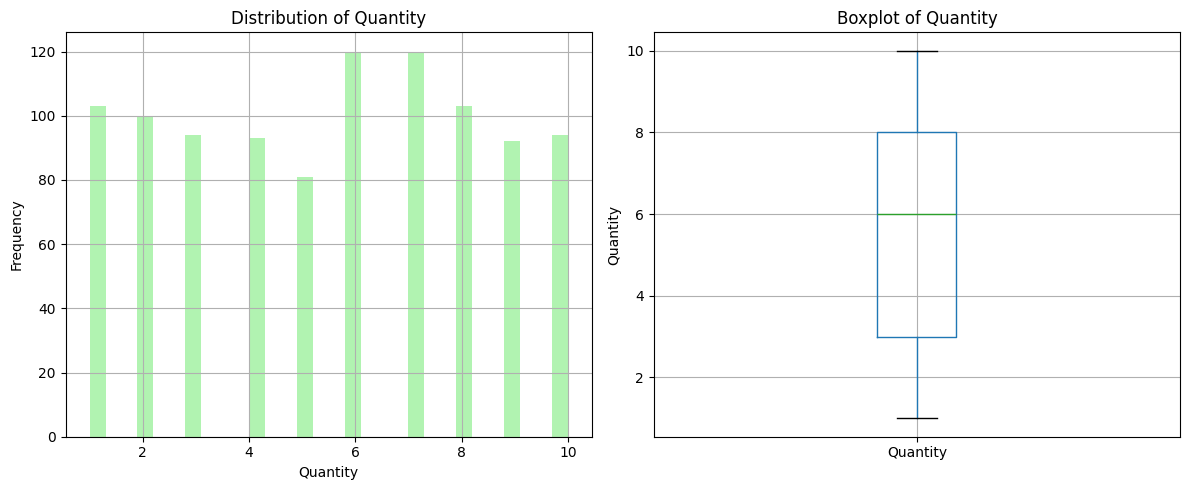


--- Unit Price ---
Mean: 2626.03
Median: 2628.50
Std Dev: 1410.61
Min: 100.00
Max: 4994.00


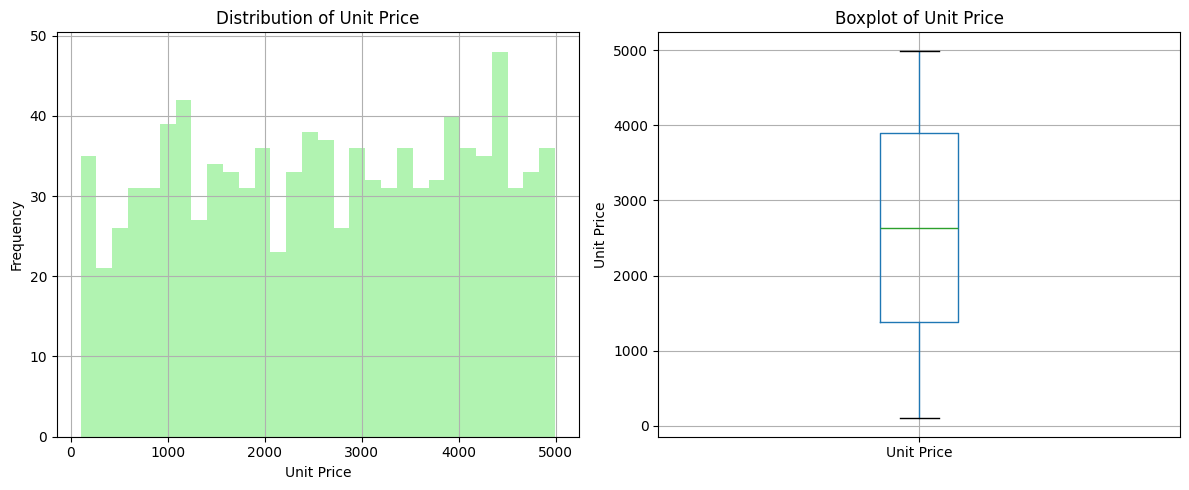


--- Discount % ---
Mean: 9.73
Median: 10.00
Std Dev: 7.17
Min: 0.00
Max: 20.00


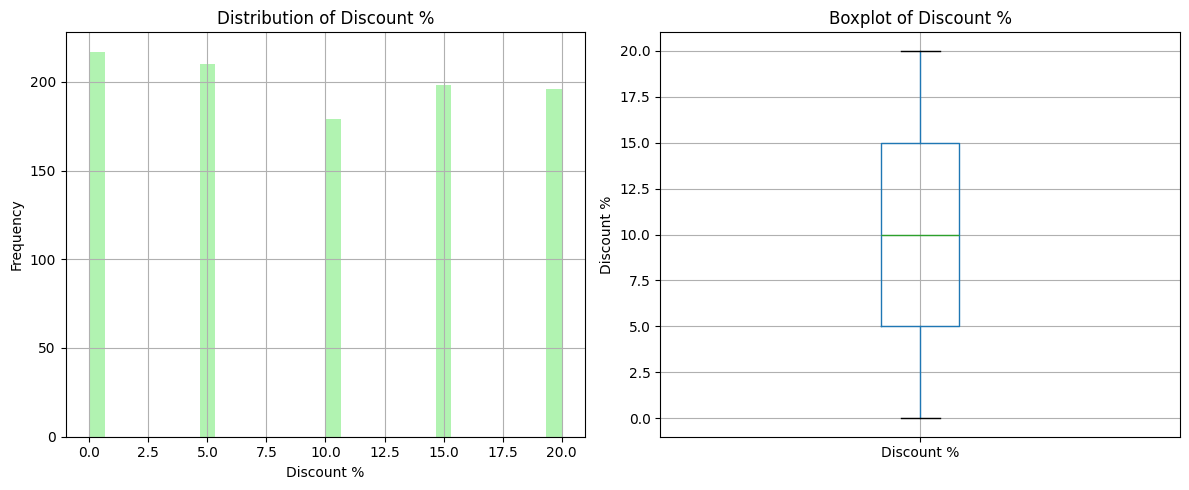


--- Sales Amount ---
Mean: 13057.24
Median: 9796.50
Std Dev: 10567.68
Min: 125.40
Max: 48830.00


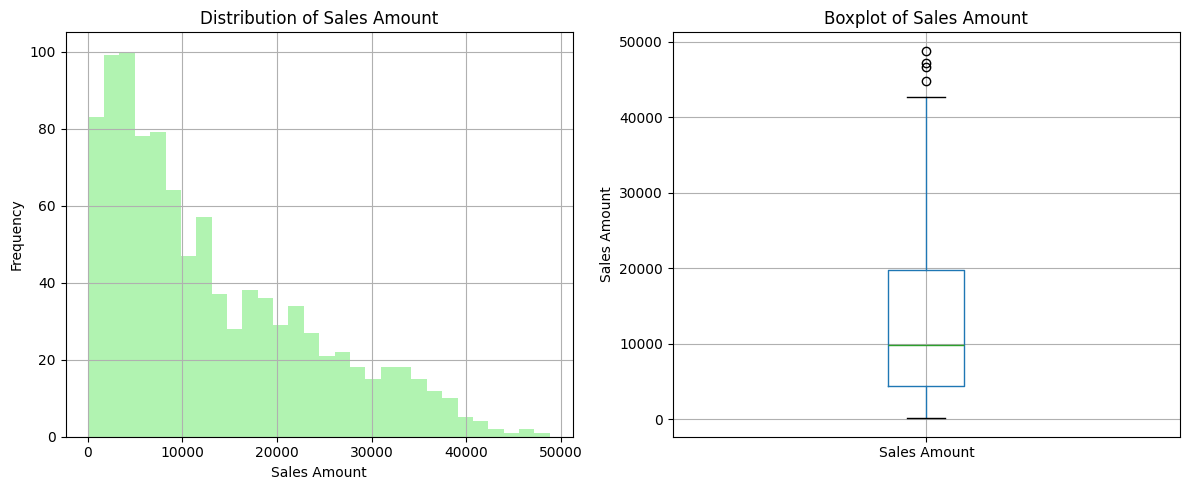


--- Cost Price ---
Mean: 10036.14
Median: 7405.41
Std Dev: 8257.61
Min: 83.74
Max: 41926.11


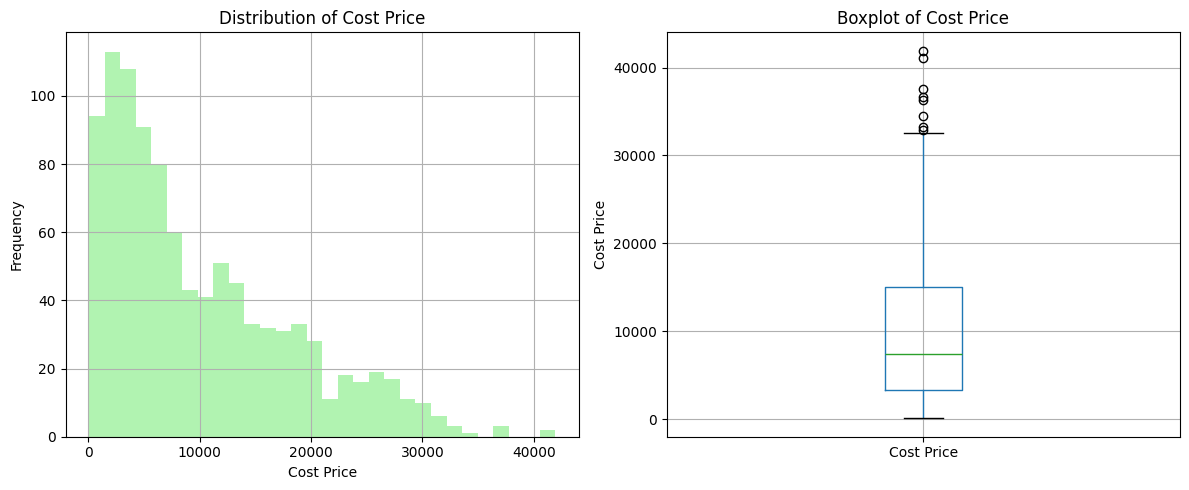


--- Profit ---
Mean: 3021.10
Median: 2070.59
Std Dev: 2733.04
Min: 19.69
Max: 15014.96


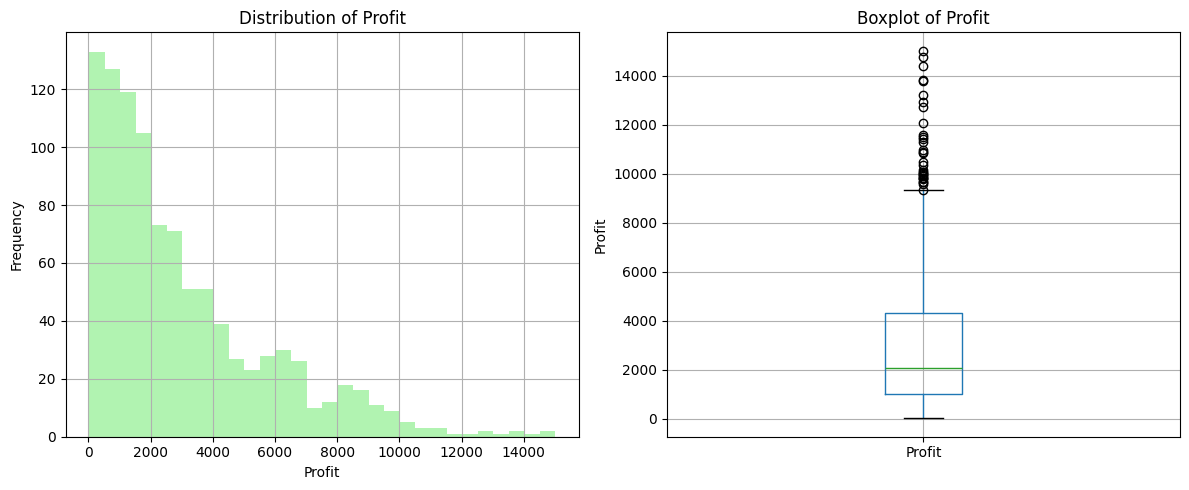


--- Stock Left ---
Mean: 24.96
Median: 25.00
Std Dev: 14.68
Min: 0.00
Max: 50.00


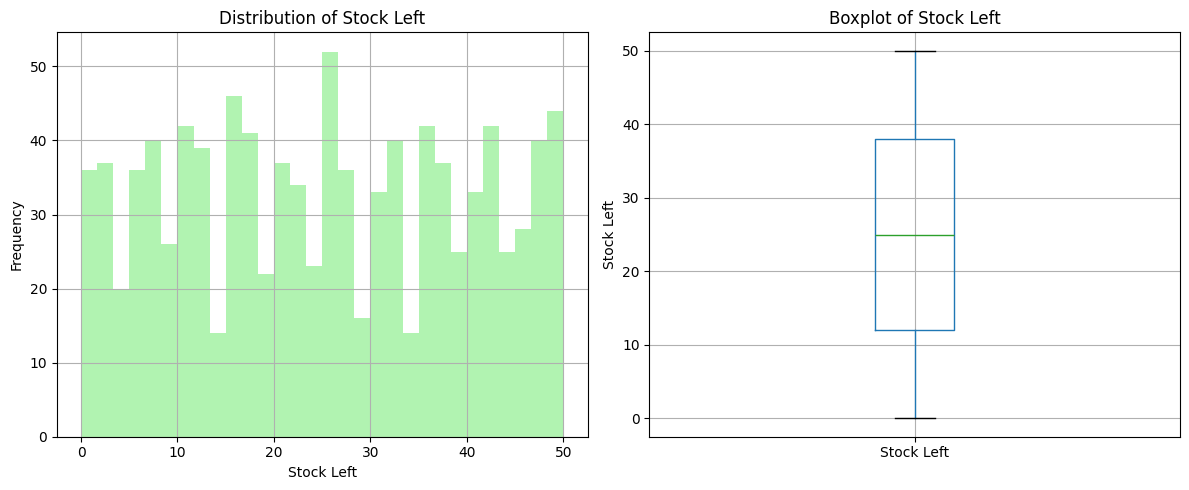


--- Reorder Quantity ---
Mean: 6.68
Median: 0.00
Std Dev: 14.11
Min: 0.00
Max: 50.00


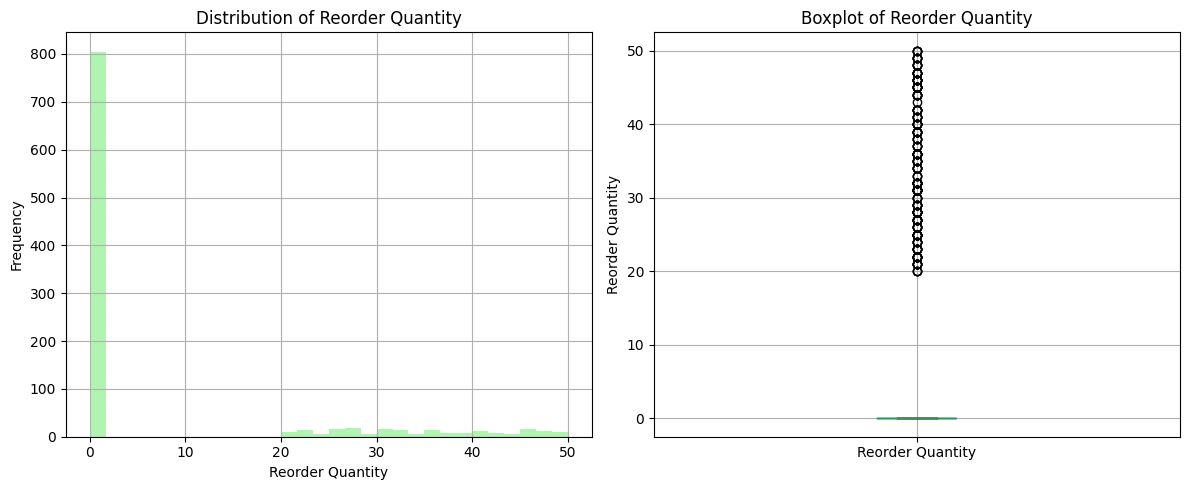

In [ ]:
print("\n=== NUMERICAL VARIABLES ===\n")

numerical_cols = ['Quantity', 'Unit Price', 'Discount %', 'Sales Amount', 'Cost Price', 'Profit', 'Stock Left', 'Reorder Quantity']

for col in numerical_cols:
  print(f"\n--- {col} ---")
  print(f"Mean: {df[col].mean():.2f}")
  print(f"Median: {df[col].median():.2f}")
  print(f"Std Dev: {df[col].std():.2f}")
  print(f"Min: {df[col].min():.2f}")
  print(f"Max: {df[col].max():.2f}")

  # Visualization
  plt.figure(figsize=(12, 5))
  plt.subplot(1, 2, 1)
  df[col].hist(bins=30, color='lightgreen', alpha=0.7)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')

  plt.subplot(1, 2, 2)
  df.boxplot(column=col)
  plt.title(f'Boxplot of {col}')
  plt.ylabel(col)

  plt.tight_layout()
  plt.show()

# Bivariate Analysis


=== SALES & PROFIT BY CATEGORY ===

                 Sales Amount     Profit  Order count  Profit Margin
Category                                                            
Electronics        3119539.10  738514.49          259      23.673833
Furniture          3642989.40  829982.87          268      22.783016
Grocery            3321702.35  757426.37          240      22.802355
Office Supplies    2973008.10  695172.19          233      23.382788




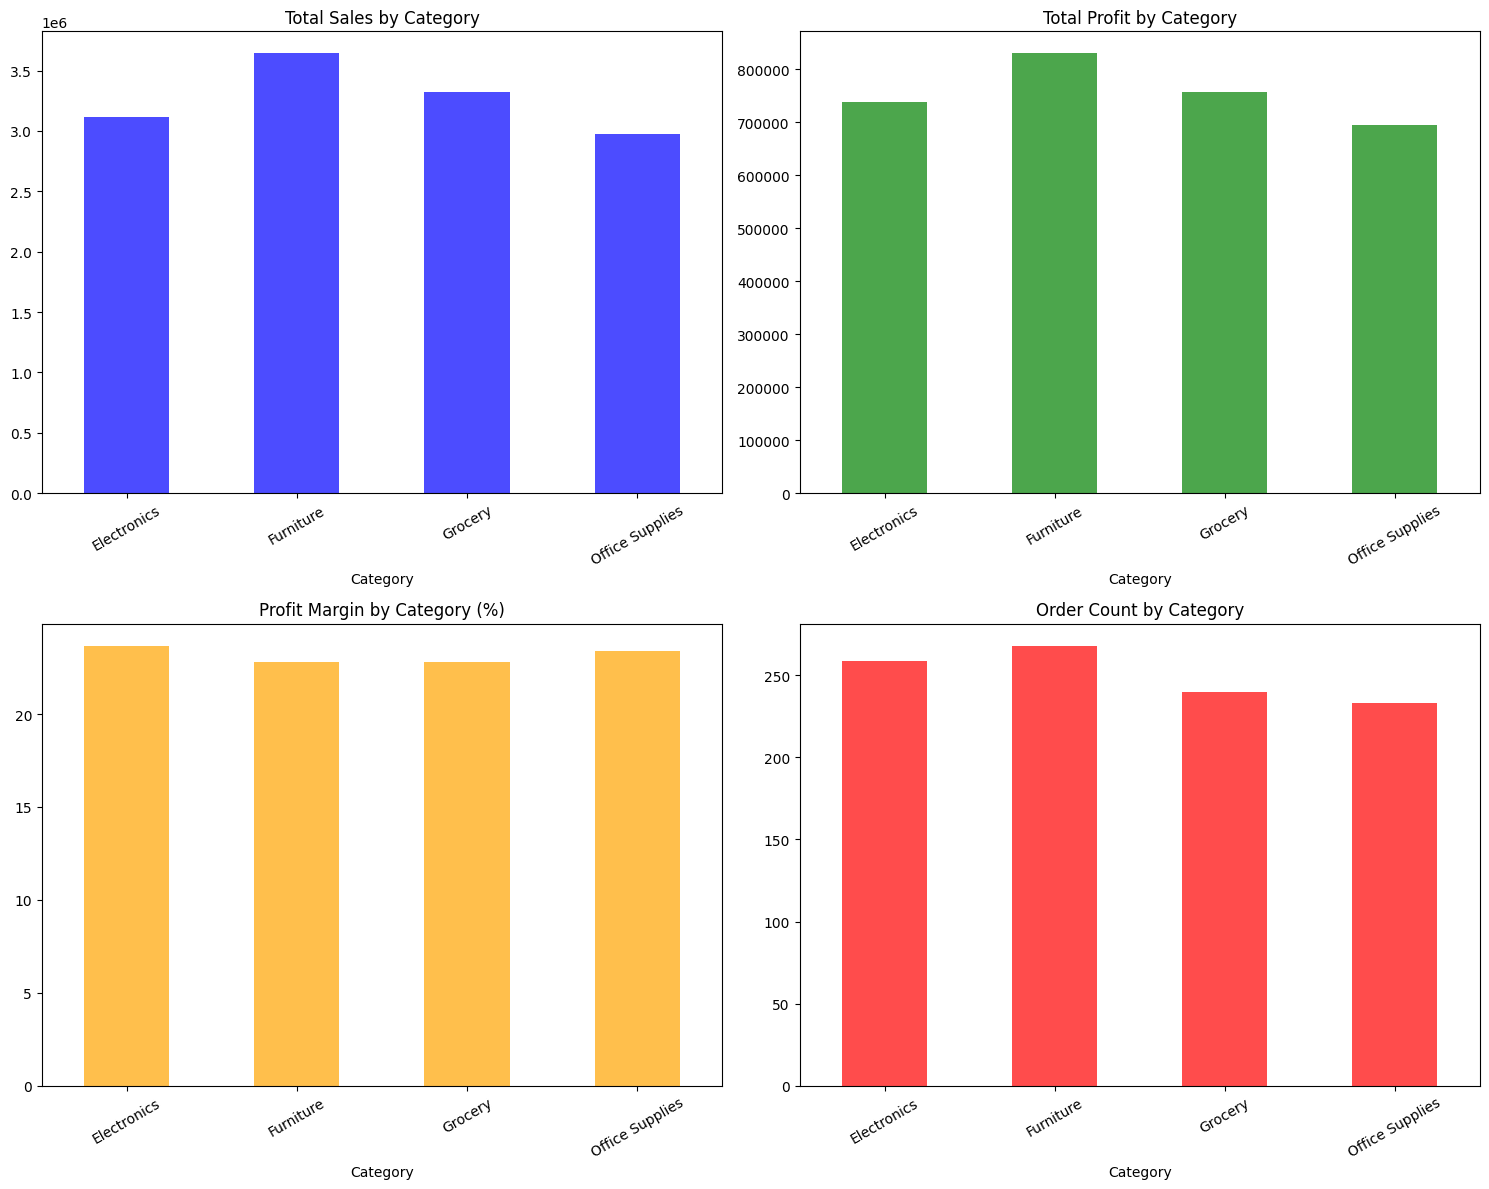

In [ ]:
# Bivariate analysis is the statistical analysis of two variables at the same time. The core purpose is to investigate the relationship between them,

print("\n=== SALES & PROFIT BY CATEGORY ===\n")

category_performance = df.groupby('Category').agg({'Sales Amount': 'sum', 'Profit': 'sum',
'Order Id': 'count'
}).rename(columns={'Order Id': 'Order count'})

category_performance['Profit Margin'] = (category_performance['Profit'] / category_performance['Sales Amount']) * 100
print(f"{category_performance}\n\n")

#Visualization
fig, axes = plt.subplots (2, 2, figsize=(15, 12))

#Sales by Category
category_performance['Sales Amount'].plot(kind='bar', ax=axes [0,0], color='blue', alpha=0.7)
axes[0,0].set_title('Total Sales by Category')
axes[0,0].tick_params(axis='x', rotation=30)

#Profit by Category
category_performance['Profit'].plot(kind='bar', ax=axes [0,1], color='green', alpha=0.7)
axes[0,1].set_title('Total Profit by Category')
axes[0,1].tick_params(axis='x', rotation=30)

#Profit Margin
category_performance['Profit Margin'].plot(kind='bar', ax=axes [1,0], color='orange', alpha=0.7)
axes[1,0].set_title('Profit Margin by Category (%)')
axes[1,0].tick_params(axis='x', rotation=30)

#Order Count
category_performance['Order count'].plot(kind='bar', ax=axes [1,1], color='red', alpha=0.7)
axes[1,1].set_title('Order Count by Category')
axes[1,1].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

# Regional Performance


=== REGIONAL PERFORMANCE ===

        Sales Amount     Profit  Order Count  Profit Margin
Region                                                     
East      3072440.00  709024.29          241      23.076912
North     3301209.95  767773.41          254      23.257334
South     3497073.20  808028.55          264      23.105852
West      3186515.80  736269.67          241      23.105791




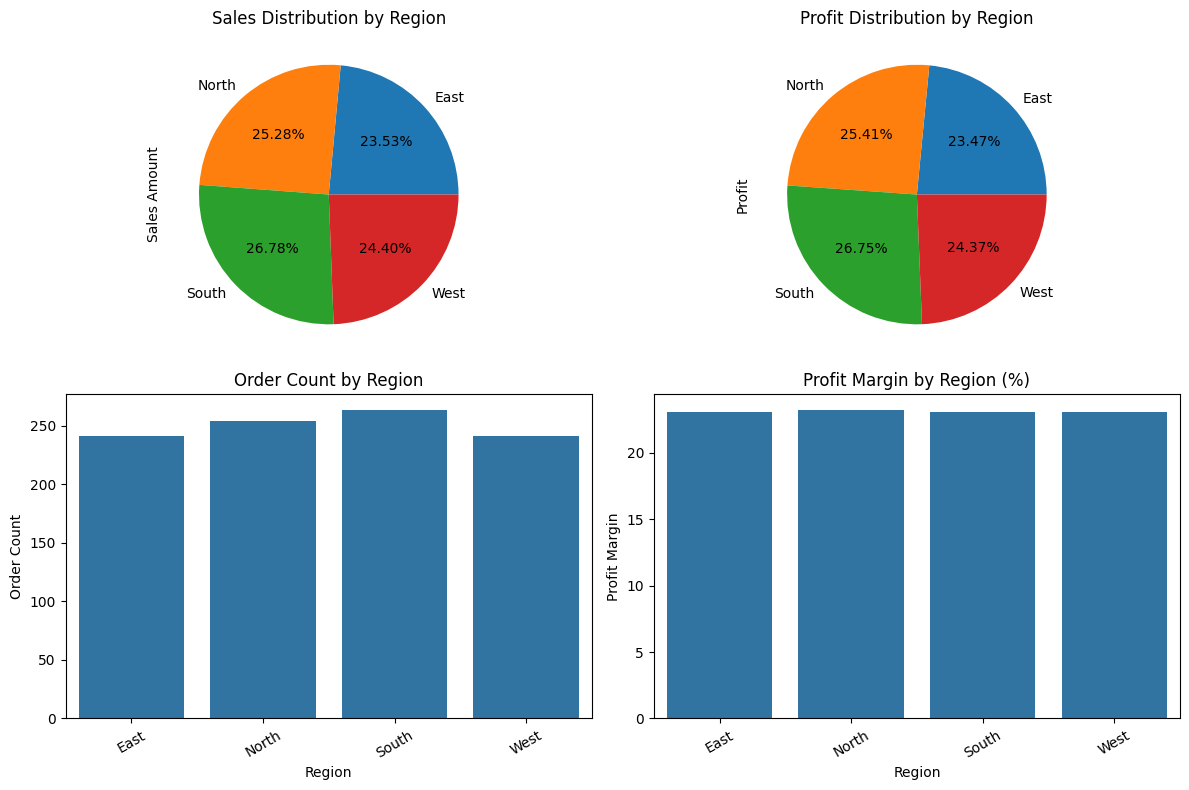

In [ ]:
print("\n=== REGIONAL PERFORMANCE ===\n")

regional_performance = df.groupby('Region').agg({
    'Sales Amount': 'sum',
    'Profit': 'sum',
    'Order Id': 'count'
}).rename(columns={'Order Id': 'Order Count'})

regional_performance['Profit Margin'] = (regional_performance['Profit'] / regional_performance['Sales Amount']) * 100
print(f"{regional_performance}\n\n")


#Visualization
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)

regional_performance["Sales Amount"].plot(kind='pie', autopct=lambda p: f'{p:.2f}%')
plt.title('Sales Distribution by Region')

plt.subplot(2, 2, 2)
regional_performance["Profit"].plot(kind='pie', autopct=lambda p: f'{p:.2f}%')
plt.title('Profit Distribution by Region')

plt.subplot(2, 2, 3)
sns.barplot(x=regional_performance.index, y='Order Count', data=regional_performance)
plt.title('Order Count by Region')
plt.xticks(rotation=30)

plt.subplot(2, 2, 4)
sns.barplot(x=regional_performance.index, y='Profit Margin', data=regional_performance)
plt.title('Profit Margin by Region (%)')
plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

#

# Time Series Analysis


=== TIME SERIES ANALYSIS ===

Monthly Trends:
             Sales Amount     Profit  Order Count
Order Month                                      
2025-03         506186.25  117624.58           41
2025-04         676821.00  164587.18           38
2025-05         415954.40   93719.02           33
2025-06         603663.10  140054.48           42
2025-07         636971.15  145317.51           47
2025-08         316978.30   73824.66           25
2025-09         712413.25  168934.22           63
2025-10         555793.85  126883.62           42
2025-11         425663.05   93070.05           35
2025-12         149772.80   37763.92           12 




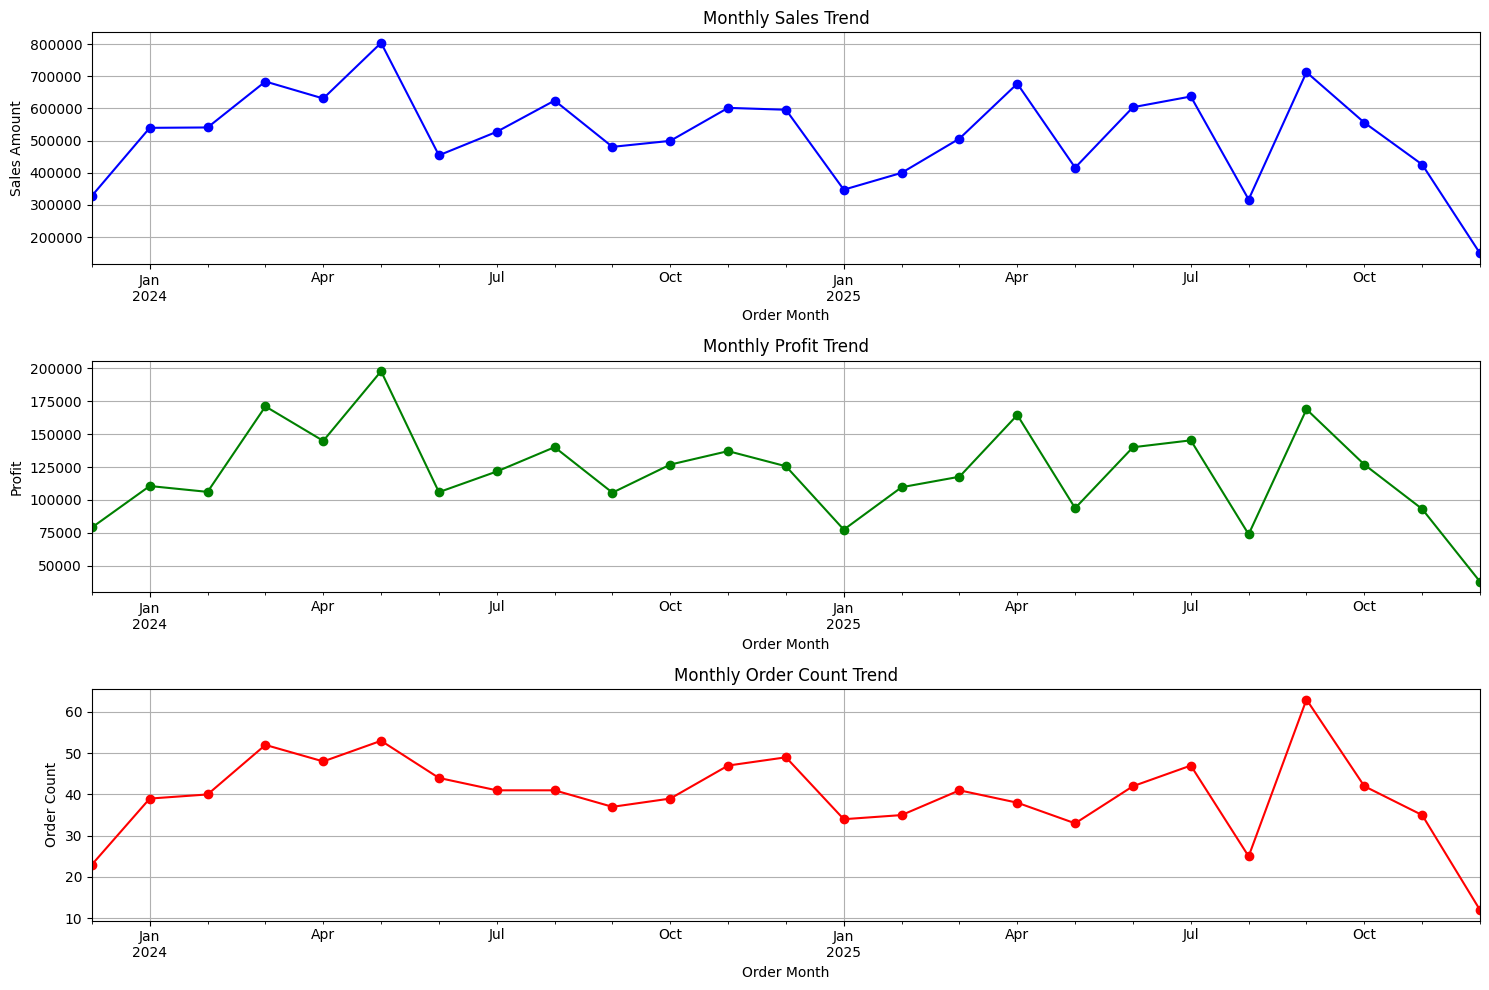

In [ ]:
print("\n=== TIME SERIES ANALYSIS ===\n")

#Extract time components
df['Order Month'] = df['Order Date'].dt.to_period('M')
df['Order Year'] = df['Order Date'].dt.year

#Monthly trends
monthly_trends = df.groupby('Order Month').agg({
'Sales Amount': 'sum',
'Profit': 'sum',
'Order Id': 'count'
}).rename(columns={'Order Id': 'Order Count'})

print("Monthly Trends:")
print(monthly_trends.tail(10), '\n\n')

#Visualization
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
monthly_trends['Sales Amount'].plot(kind='line', color='blue', marker='o')
plt.title('Monthly Sales Trend')
plt.ylabel('Sales Amount')
plt.grid(True)

plt.subplot(3, 1, 2)
monthly_trends ['Profit'].plot(kind='line', color='green', marker='o')
plt.title('Monthly Profit Trend')
plt.ylabel('Profit')
plt.grid(True)

plt.subplot(3, 1, 3)
monthly_trends['Order Count'].plot(kind='line', color='red', marker='o')
plt.title('Monthly Order Count Trend')
plt.ylabel('Order Count')
plt.grid(True)

plt.tight_layout()
plt.show()

# Advanced Analysis


=== CORRELATION ANALYSIS ===

Correlation Matrix:
              Quantity  Unit Price  Discount %  Sales Amount  Cost Price  \
Quantity      1.000000    0.008057    0.040847      0.643066    0.637241   
Unit Price    0.008057    1.000000    0.040794      0.678070    0.667651   
Discount %    0.040847    0.040794    1.000000     -0.048035   -0.043664   
Sales Amount  0.643066    0.678070   -0.048035      1.000000    0.987778   
Cost Price    0.637241    0.667651   -0.043664      0.987778    1.000000   
Profit        0.561147    0.604611   -0.053806      0.882167    0.797982   

                Profit  
Quantity      0.561147  
Unit Price    0.604611  
Discount %   -0.053806  
Sales Amount  0.882167  
Cost Price    0.797982  
Profit        1.000000   




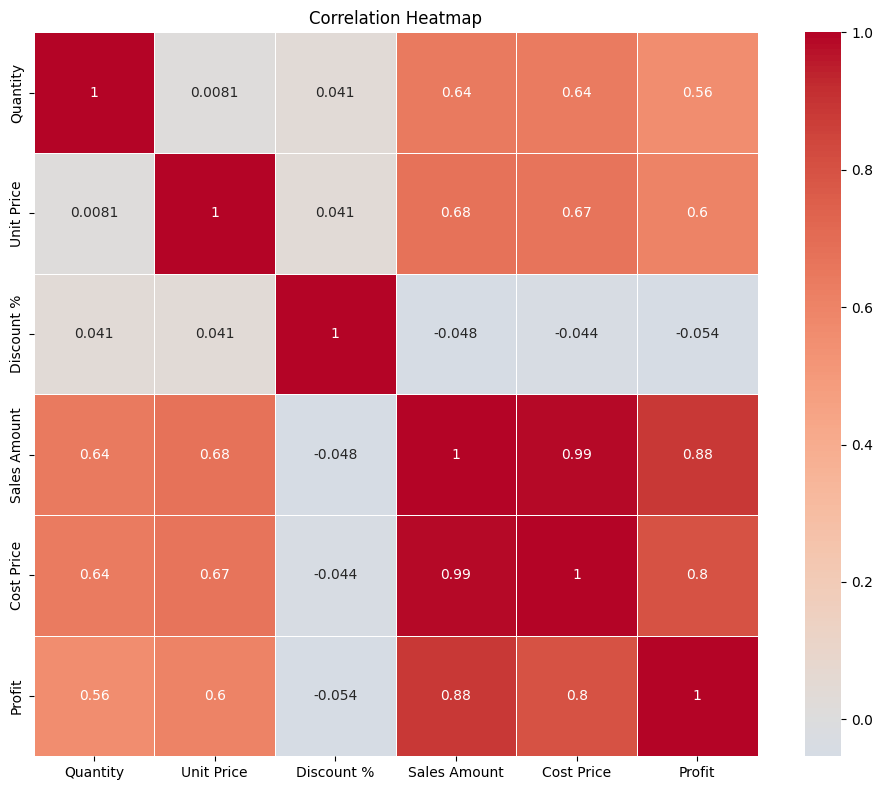

In [ ]:
print("\n=== CORRELATION ANALYSIS ===\n")

# Select numerical columns for correlation
numerical_df = df[['Quantity', 'Unit Price', 'Discount %', 'Sales Amount', 'Cost Price', 'Profit']]


# Correlation matrix
correlation_matrix = numerical_df.corr()
print("Correlation Matrix:")
print(correlation_matrix, '\n\n')

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# Customer Segment Analysis


=== CUSTOMER SEGMENT ANALYSIS ===

                  Total Sales  Avg Sales  Total Profit  Avg Profit  \
Customer Segment                                                     
Consumer           4341242.15   13195.26     991735.94     3014.39   
Corporate          4636345.00   13322.83    1094739.77     3145.80   
Home Office        4079651.80   12630.50     934620.21     2893.56   

                  Order Count  Avg Discount  
Customer Segment                             
Consumer                  329         10.46  
Corporate                 348          9.43  
Home Office               323          9.32   




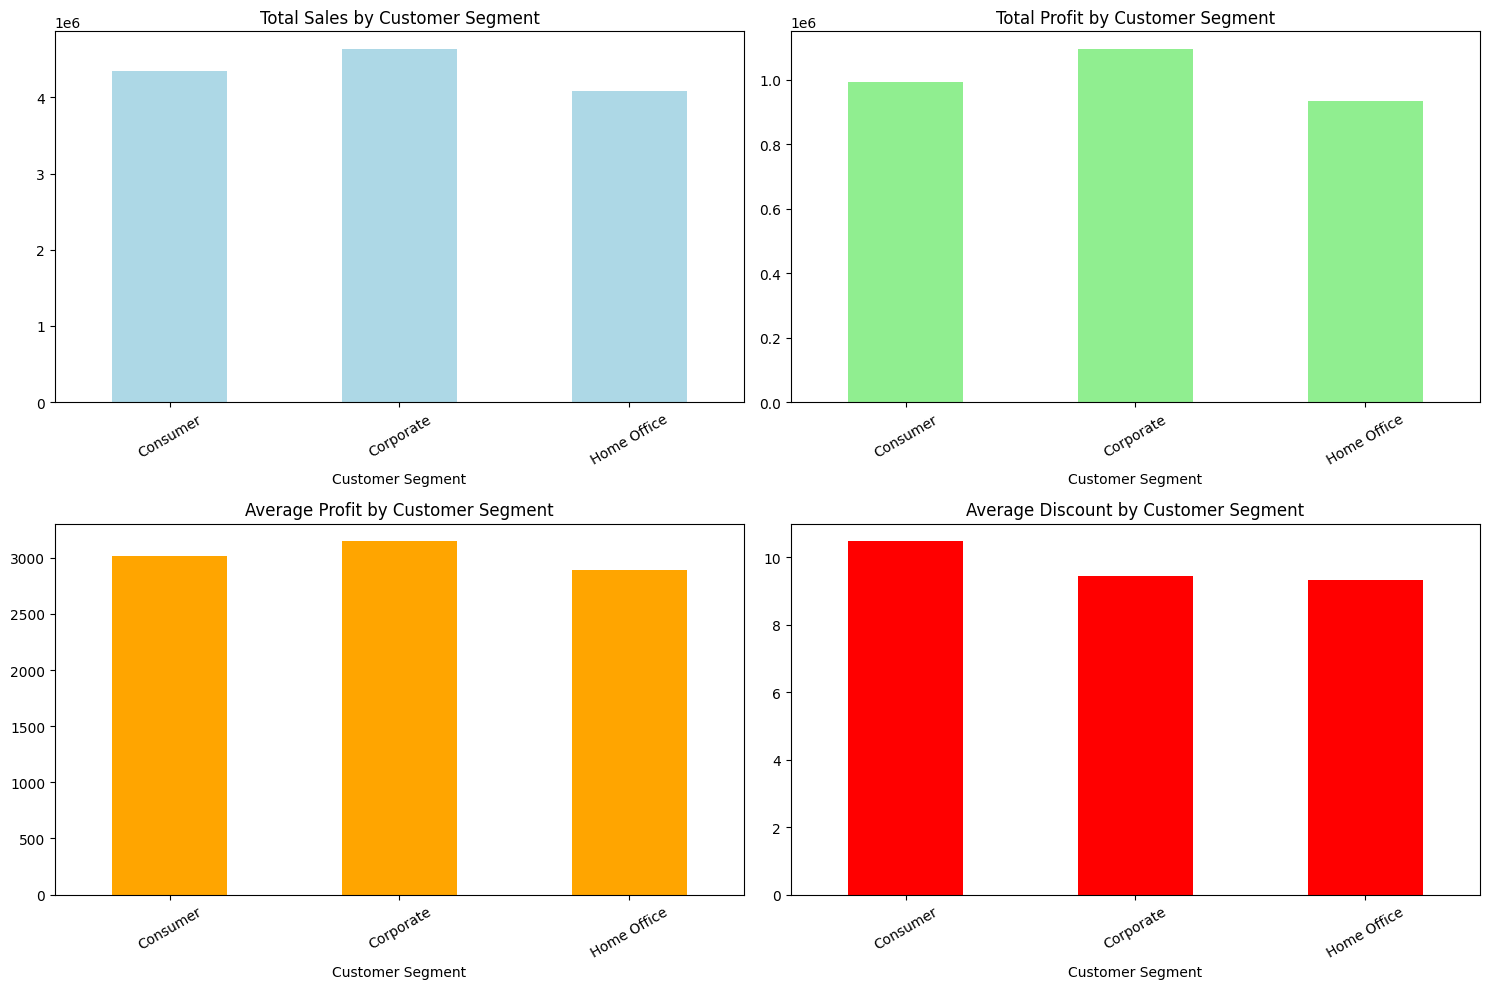

In [ ]:
print("\n=== CUSTOMER SEGMENT ANALYSIS ===\n")

segment_analysis = df.groupby('Customer Segment').agg({
'Sales Amount': ['sum', 'mean'],
'Profit': ['sum', 'mean'],
'Order Id': 'count',
'Discount %': 'mean'
}).round(2)

segment_analysis.columns = ['Total Sales', 'Avg Sales', 'Total Profit', 'Avg Profit', 'Order Count', 'Avg Discount']
print(segment_analysis, '\n\n')

#Visualization
fig, axes = plt.subplots (2, 2, figsize=(15, 10))

segment_analysis['Total Sales'].plot(kind='bar', ax=axes [0,0], color='lightblue')
axes[0,0].set_title('Total Sales by Customer Segment')
axes[0,0].tick_params(axis='x', rotation=30)


segment_analysis['Total Profit'].plot(kind='bar', ax=axes [0,1], color='lightgreen')
axes[0,1].set_title('Total Profit by Customer Segment')
axes[0,1].tick_params(axis='x', rotation=30)

segment_analysis['Avg Profit'].plot(kind='bar', ax=axes [1,0], color='orange')
axes[1,0].set_title('Average Profit by Customer Segment')
axes[1,0].tick_params(axis='x', rotation=30)

segment_analysis['Avg Discount'].plot(kind='bar', ax=axes [1,1], color='red')
axes[1,1].set_title('Average Discount by Customer Segment')
axes[1,1].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

# Key Insights and Summary

In [ ]:
print("\n=== KEY INSIGHTS SUMMARY ===")

#Overall Metrics
total_sales = df['Sales Amount'].sum()
total_profit = df['Profit'].sum()
total_orders = df['Order Id'].nunique()
avg_profit_margin= (total_profit / total_sales) * 100

print("OVERALL PERFORMANCE:\n")
print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Total Orders: {total_orders}")
print(f"Average Profit Margin: {avg_profit_margin:.2f}%")

#Top Performing Categories
top_categories = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)
print(f"\nTOP PERFORMING CATEGORIES:\n")
for i, (category, profit) in enumerate(top_categories.items(), 1):
  print(f"{i}. {category}: ${profit:,.2f}")

#Regional Performance
best_region = df.groupby('Region')['Profit'].sum().idxmax()
print(f"\nBEST PERFORMING REGION: {best_region}")

#Delivery Performance
delivery_stats = df[ 'Delivery Status'].value_counts(normalize=True) * 100
print(f"\nDELIVERY STATUS:")
for status, percentage in delivery_stats.items():
  print(f"{status}: {percentage:.1f}%")

#Customer Segments
best_segment = df.groupby('Customer Segment')['Profit'].sum().idxmax()
print(f"\nMOST PROFITABLE CUSTOMER SEGMENT: {best_segment}")


=== KEY INSIGHTS SUMMARY ===
OVERALL PERFORMANCE:

Total Sales: $13,057,238.95
Total Profit: $3,021,095.92
Total Orders: 1000
Average Profit Margin: 23.14%

TOP PERFORMING CATEGORIES:

1. Furniture: $829,982.87
2. Grocery: $757,426.37
3. Electronics: $738,514.49
4. Office Supplies: $695,172.19

BEST PERFORMING REGION: South

DELIVERY STATUS:
Delivered: 26.3%
Pending: 24.8%
Cancelled: 24.7%
Returned: 24.2%

MOST PROFITABLE CUSTOMER SEGMENT: Corporate


# Export Results

In [ ]:
analysis_results = {
'total_sales': total_sales,
'total_profit': total_profit,
'total_orders': total_orders,
'avg_profit_margin': avg_profit_margin,
'top_category': top_categories.index[0],
'best_region': best_region,
'best_customer_segment': best_segment
}


# Convert to DataFrame and save
results_df = pd.DataFrame ([analysis_results])
results_df.to_csv('eda_analysis_summary.csv',
index=False)
print("\n Analysis summary saved to 'eda_analysis_summary.csv'")


 Analysis summary saved to 'eda_analysis_summary.csv'
